In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks, argrelmin
import pandas as pd
from collections import Counter
import os


In [2]:
def get_stats(check_list):
    standard = float(np.std(check_list))
    mean = float(np.mean(check_list))
    return [min(check_list),mean-standard-standard,mean-standard,mean,mean + standard,mean +standard+standard ,max(check_list) ]


In [3]:
path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a002/a002.initial.Static_seated_challenge_1.tsv"
path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a004/a004.initial.Exercise_challenge_start_1.tsv"


In [14]:

def get_x_average(path):
    
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]
    neglist = [ -x for x in pos_pressure]
    min_peaks, _ = find_peaks(neglist )
    max_peak, _ = find_peaks(pos_pressure)

    #this removes all elemerns with in 40 of the mini
    unnecessary_points_overlapped = []
    for mini in list(min_peaks):
        if len(set(range(mini-40,40+mini)).intersection(set(max_peak)))>0:
            unnecessary_points_overlapped.append(int(mini))

    combo_list =  list(min_peaks)+ (unnecessary_points_overlapped)
    combo_list = [int(i) for i in combo_list]

    # juts deleted stuff from both lists if its in tht 40 range 
    # THIS IS THE MOST IMPORTANT 
    most_accurate_mins = [k for k,v in Counter(combo_list).items() if v==1]

    diffrences_new_min = np.diff(most_accurate_mins)
    mean_new_min = float(diffrences_new_min.mean())

    # overlapping every beat 
    all_overlaps = [[] for i in range(int(max(diffrences_new_min)))]


    for i in range(len(most_accurate_mins)-1):
        if (int(most_accurate_mins[i+1]) -int(most_accurate_mins[i]))< get_stats(diffrences_new_min)[4] :
            y_range  = list(range(int(most_accurate_mins[i]),int(most_accurate_mins[i+1])))
            y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]

            x_range = list(range(int(most_accurate_mins[i]),int(most_accurate_mins[i+1])))
            x_of_shift = [int(x - x_range[0]) for x in x_range]

            start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)
            y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]

            for x_indi in range(len(x_range)):
                all_overlaps[x_indi].append(int(y_rotated[x_indi]-start_end_line[x_indi]))
            
            
            



    #to get data for the overall mean 
    all_overlaps_means = []
    # mean for each row
    for lists in all_overlaps:
        all_overlaps_means.append(np.mean(lists))

    all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']


    #to get data for the overall mean 
    all_overlaps_means = []
    # mean for each row
    for lists in all_overlaps:
        all_overlaps_means.append(np.mean(lists))

    all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']



    #THIS IS THE list of x's
    data_points_average_overlapped = list(zip(all_overlaps_means, list(range(len(all_overlaps_means)))))
    

    return all_overlaps_means

In [15]:

# plt.plot(all_overlaps_means[0::10], **{'color': 'green', 'marker': 'o'})
# plt.title("average based on all rates")
# plt.ylabel("Pressure")
# plt.xlabel("time seconds")

/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


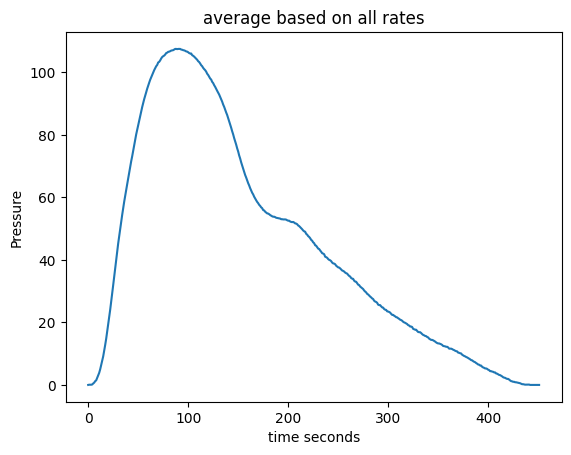

In [21]:
full_path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/"

# plt.rcParams["figure.figsize"] = (10,16)
# plt.figure(figsize=(100, 100)) 

for files in os.listdir("/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000"):
    #print(files)
    
    xes = get_x_average(full_path+files)

    
    plt.title("average based on all rates")
    plt.ylabel("Pressure")
    plt.xlabel("time seconds")
    plt.plot(xes )#, **{'color': 'green', 'marker': 'o'})
    break


In [17]:
def get_person_activity_data(person_id,activity):
    auscultatory_data = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory.tsv"
    basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t') 
    
    filler_to_person = basic_mesures_data[basic_mesures_data["pid"].str.contains(person_id)]
    
    activity_file_path = f"measurements_auscultatory/{person_id}/{activity}"
    print(filler_to_person['waveform_file_path'])
    #return filler_to_person[(filler_to_person['waveform_file_path'].str.contains(activity_file_path))]
    #filter_to_activity = filler_to_person[filler_to_person["waveform_file_path"].str.contains(activity_file_path)]


    print("um")
    return filter_to_activity





In [18]:
for files in os.listdir("/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000"):
    
    print(get_person_activity_data("a000",files ))

0     measurements_auscultatory/a000/a000.initial.Ca...
1     measurements_auscultatory/a000/a000.initial.Ca...
2                                                   NaN
3     measurements_auscultatory/a000/a000.initial.St...
4     measurements_auscultatory/a000/a000.initial.St...
5     measurements_auscultatory/a000/a000.initial.St...
6     measurements_auscultatory/a000/a000.initial.St...
7     measurements_auscultatory/a000/a000.initial.St...
8     measurements_auscultatory/a000/a000.initial.St...
9     measurements_auscultatory/a000/a000.initial.Ex...
10    measurements_auscultatory/a000/a000.initial.Ex...
11    measurements_auscultatory/a000/a000.return.Tem...
12    measurements_auscultatory/a000/a000.return.Tem...
13    measurements_auscultatory/a000/a000.return.Tem...
Name: waveform_file_path, dtype: object
um


NameError: name 'filter_to_activity' is not defined

In [ ]:
auscultatory_data = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory.tsv"
basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t') 

,pid,phase,measurement,date_time,sbp,dbp,duration,pressure_quality,optical_quality,waveform_file_path,waveforms_generated,primary_systolic,primary_diastolic,secondary_systolic,secondary_diastolic,consensus_systolic_error,consensus_diastolic_error
0,a000,initial,Calibration start 1,2018-01-01 13:14:20,110.0,74.0,18.5,1.0,0.983,measurements_auscultatory/a000/a000.initial.Ca...,1,108.0,72.0,112.0,76.0,4.0,4.0
1,a000,initial,Calibration start 2,2018-01-01 13:16:15,113.0,73.0,17.8,1.0,0.950,measurements_auscultatory/a000/a000.initial.Ca...,1,114.0,70.0,112.0,76.0,2.0,6.0
2,a000,initial,Calibration start 3,2018-01-01 13:17:59,118.0,71.0,0.0,-1.0,-1.000,NaN,0,118.0,72.0,118.0,70.0,0.0,2.0
3,a000,initial,Static challenge start 1,2018-01-01 13:19:49,121.0,71.0,21.0,1.0,0.928,measurements_auscultatory/a000/a000.initial.St...,1,120.0,72.0,122.0,70.0,2.0,2.0
4,a000,initial,Static challenge start 2,2018-01-01 13:21:44,111.0,73.0,20.2,1.0,1.000,measurements_auscultatory/a000/a000.initial.St...,1,110.0,72.0,112.0,74.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,a005,initial,Exercise challenge start 1,2018-01-01 09:34:54,131.5,50.0,20.5,1.0,0.997,measurements_auscultatory/a005/a005.initial.Ex...,1,133.0,54.0,130.0,46.0,3.0,8.0
92,a005,initial,Exercise challenge start 2,2018-01-01 09:40:22,115.5,50.0,20.7,1.0,0.976,measurements_auscultatory/a005/a005.initial.Ex...,1,117.0,48.0,114.0,52.0,3.0,4.0
93,a005,return,Temporal challenge start 1,2018-01-02 14:38:34,115.0,71.0,17.8,1.0,0.949,measurements_auscultatory/a005/a005.return.Tem...,1,116.0,70.0,114.0,72.0,2.0,2.0
94,a005,return,Temporal challenge start 2,2018-01-02 14:40:13,109.0,71.0,17.6,1.0,0.906,measurements_auscultatory/a005/a005.return.Tem...,1,108.0,72.0,110.0,70.0,2.0,2.0
